# https://pbpython.com/python-face-detect.html

In [1]:
from pathlib import Path
from urllib.parse import urlparse
import requests
import json
from PIL import Image
from io import BytesIO
from matplotlib import patches
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
subscription_key = '9a1111e22294eb1bb9999a4a66e07b41'
face_api_url = 'https://northcentralus.api.cognitive.microsoft.com/face/v1.0/detect'
face_api_url_verify = 'https://northcentralus.api.cognitive.microsoft.com/face/v1.0/verify'

In [22]:
image_url = 'https://amp.insider.com/images/5a9878b3267894f3058b4676-640-480.jpg'
headers = {'Ocp-Apim-Subscription-Key': subscription_key}

params = {
    'returnFaceId':
    'true',
    'returnFaceLandmarks':
    'false',
    'returnFaceAttributes':
    'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

response = requests.post(face_api_url,
                        params=params,
                        headers=headers,
                        json={"url": image_url})

In [23]:
response.json()

{'error': {'code': '401',
  'message': 'Access denied due to invalid subscription key or wrong API endpoint. Make sure to provide a valid key for an active subscription and use a correct regional API endpoint for your resource.'}}

In [5]:
print(len(response.json()))

1


In [7]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key,
           'Content-Type': 'application/octet-stream'}

image_data = open('/home/ncyc-admin/Project/Beauty/File/Sample_local_image.jpg', 'rb').read()
response = requests.post(face_api_url, headers=headers, params=params, data=image_data)

In [8]:
def annotate_image(image_url, subscription_key, api_url, show_face_id=False):
    """ Helper function for Microsoft Azure face detector.

    Args:
        image_url: Can be a remote http://  or file:// url pointing to an image less then 10MB
        subscription_key: Cognitive services generated key
        api_url: API end point from Cognitive services
        show_face_id: If True, display the first 6 characters of the faceID

    Returns:
        figure: matplotlib figure that contains the image and boxes around the faces with their age and gender
        json response: Full json data returned from the API call

    """

    # The default header must include the sunbscription key
    headers = {'Ocp-Apim-Subscription-Key': subscription_key}

    params = {
        'returnFaceId': 'true',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
    }

    # Figure out if this is a local file or url
    parsed_url = urlparse(image_url)
    if parsed_url.scheme == 'file':
        image_data = open(parsed_url.path, "rb").read()

        # When making the request, we need to add a Content-Type Header
        # and pass data instead of a url
        headers['Content-Type']='application/octet-stream'
        response = requests.post(api_url, params=params, headers=headers, data=image_data)

        # Open up the image for plotting
        image = Image.open(parsed_url.path)
    else:
        # Pass in the URL to the API
        response = requests.post(api_url, params=params, headers=headers, json={"url": image_url})
        image_file = BytesIO(requests.get(image_url).content)
        image = Image.open(image_file)

    faces = response.json()

    fig, ax = plt.subplots(figsize=(10,10))

    ax.imshow(image, alpha=0.6)
    for face in faces:
        fr = face["faceRectangle"]
        fa = face["faceAttributes"]
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(origin, fr["width"],
                            fr["height"], fill=False, linewidth=2, color='b')
        ax.axes.add_patch(p)
        ax.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]),
                fontsize=16, weight="bold", va="bottom")

        if show_face_id:
            ax.text(origin[0], origin[1]+fr["height"], "%s"%(face["faceId"][:5]),
            fontsize=12, va="bottom")
    ax.axis("off")

    # Explicitly closing image so it does not show in the notebook
    plt.close()
    return fig, faces

TypeError: string indices must be integers

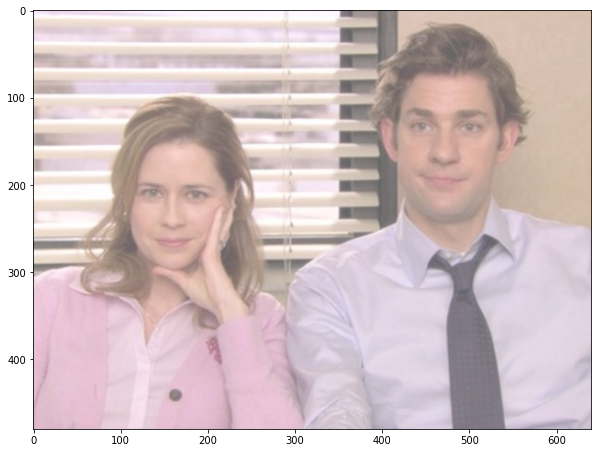

In [10]:
labeled_image, response_1 = annotate_image(
    'https://amp.insider.com/images/5a9878b3267894f3058b4676-640-480.jpg',
    subscription_key,
    face_api_url,
    show_face_id=True)

labeled_image

In [11]:
labeled_image, response_data = annotate_image(
    "file:///home/chris/Pictures/P1120573.JPG", subscription_key,
    face_api_url)

FileNotFoundError: [Errno 2] No such file or directory: '/home/chris/Pictures/P1120573.JPG'

In [12]:
print(response_1[0]['faceId'], response_1[0]['faceAttributes']['emotion'])

NameError: name 'response_1' is not defined

In [13]:
6e750a8f-9a55-4b03-a9ce-b79d5cb93740 {'anger': 0.0, 'contempt': 0.075, 'disgust': 0.0, 'fear': 0.0, 'happiness': 0.012, 'neutral': 0.913, 'sadness': 0.0, 'surprise': 0.0}

SyntaxError: invalid syntax (<ipython-input-13-4c6241af1693>, line 1)

In [14]:
def face_compare(id_1, id_2, api_url):
    """ Determine if two faceIDs are for the same person
    Args:
        id_1: faceID for person 1
        id_2: faceID for person 2
        api_url: API end point from Cognitive services
        show_face_id: If True, display the first 6 characters of the faceID

    Returns:
        json response: Full json data returned from the API call

    """
    headers = {
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': subscription_key
    }

    body = {"faceId1": id_1, "faceId2": id_2}

    params = {}
    response = requests.post(api_url,
                            params=params,
                            headers=headers,
                            json=body)
    return response.json()

TypeError: string indices must be integers

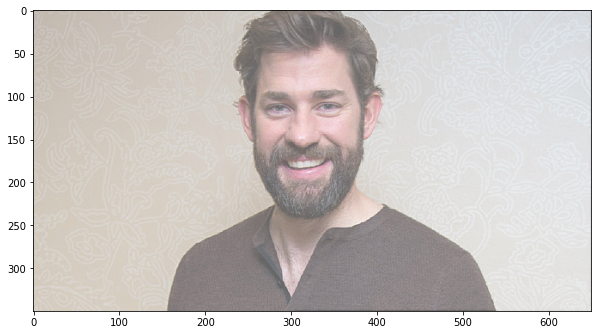

In [15]:
john_k_2 = 'https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/magazine/2018/05_2018/john_krasinski_magazine/650x350_john_krasinski_magazine.jpg'
labeled_image, response_2 = annotate_image(john_k_2,
                                           subscription_key,
                                           face_api_url,
                                           show_face_id=True)

In [16]:
face_compare(response_2[0]['faceId'], response_1[0]['faceId'], face_api_url_verify)

NameError: name 'response_2' is not defined

In [ ]:
zooey_katy = 'https://www.nydailynews.com/resizer/vboKUbzNIwhFRFfr-jGqZlmx0Ws=/800x597/top/arc-anglerfish-arc2-prod-tronc.s3.amazonaws.com/public/VE7PI5PUDWW2BTS7NYR5OWEL3A.jpg'
labeled_image_z_k, response_3 = annotate_image(
                                zooey_katy, subscription_key, face_api_url)

In [ ]:
face_compare(response_3[0]['faceId'], response_3[1]['faceId'],
            face_api_url_verify)

In [ ]:
rob_lowe = 'http://cdn.ppcorn.com/wp-content/uploads/sites/14/2015/08/rob-ian-ppcorn-760x500.jpg'
labeled_image_rob, response_4 = annotate_image(rob_lowe, subscription_key,
                                               face_api_url)

In [ ]:
face_compare(response_4[0]['faceId'], response_4[1]['faceId'],
                face_api_url_verify)

In [ ]:
friends_url = 'https://pmctvline2.files.wordpress.com/2019/03/friends-revival.jpg'
labeled_image, response_5 = annotate_image(friends_url, subscription_key,
                                        face_api_url)
print(f'{len(response_5)} People in this picture')